In [1]:
import lmdb
from collections import Counter
import matplotlib.pyplot as plt

def get_labels_count(lmdb_path):
    """Extracts label counts from an LMDB file."""
    label_counts = Counter()
    env = lmdb.open(lmdb_path, readonly=True, lock=False)
    with env.begin() as txn:
        cursor = txn.cursor()
        for key, value in cursor:
            label = value.decode()  # Decode the byte-encoded label to a string
            label_counts[label] += 1  # Increment the count for this label
    return label_counts

# Paths to the folders containing 'labels' LMDB files
folders = ["CPICS",
    "datasciencebowl",
    "FlowCamNet",
    "ISIISNet",
    "UVPEC",
    "ZooCamNet",
    "ZooScanNet"
]

# Base directory containing all folders
base_path = "/home/hk-project-p0021769/hgf_grc7525/workspace/hkfswork/hgf_grc7525-nick/data/lmdb_with_labels"

# Combine label counts across all folders
combined_label_counts = Counter()

for folder in folders:
    labels_lmdb_path = f"{base_path}/{folder}/labels"
    folder_label_counts = get_labels_count(labels_lmdb_path)
    combined_label_counts.update(folder_label_counts)

# Print the results for verification
print("Total images per class/label:")
for label, count in combined_label_counts.items():
    print(f"Label {label}: {count} images")

# Check the total count for the label "detritus"
detritus_count = combined_label_counts.get('detritus', 0)
print(f"Total number of images labeled as 'detritus': {detritus_count}")



Total images per class/label:
Label 26.Chaetognatha: 646 images
Label 27.Hydrozoa: 74 images
Label 28.Larvacea: 102 images
Label 29.Polychaeta: 4602 images
Label 30.Benthic_algae: 1714 images
Label 31.Polyp: 143 images
Label 32.1Adult_Fish: 6225 images
Label 33.Air_bubble: 2529 images
Label Ba.22.Cypris_larva: 1920 images
Label Ba.Barnacle_nauplius: 5 images
Label CC.Copepod: 96419 images
Label Cr.Crustacea: 37279 images
Label Cy.Trichodesmium_: 40 images
Label Detritus: 630780 images
Label Df.02.Ceratium: 382 images
Label Df.03.Noctiluca_scintillans: 4721 images
Label Di.Diatom: 33123 images
Label Doubts: 198 images
Label Foraminiferida: 46 images
Label Organism_parts_general: 134132 images
Label Pa.35.Marine_snow_aggregate_large: 7680 images
Label Pa.35.Marine_snow_aggregate_medium: 142888 images
Label Pa.35.Marine_snow_aggregate_small: 11341 images
Label Pa.35.Marine_snow_com_large: 13577 images
Label Pa.35.Marine_snow_com_medium: 60663 images
Label Pa.35.Marine_snow_com_small: 2310

# plot the barplot (sorted)

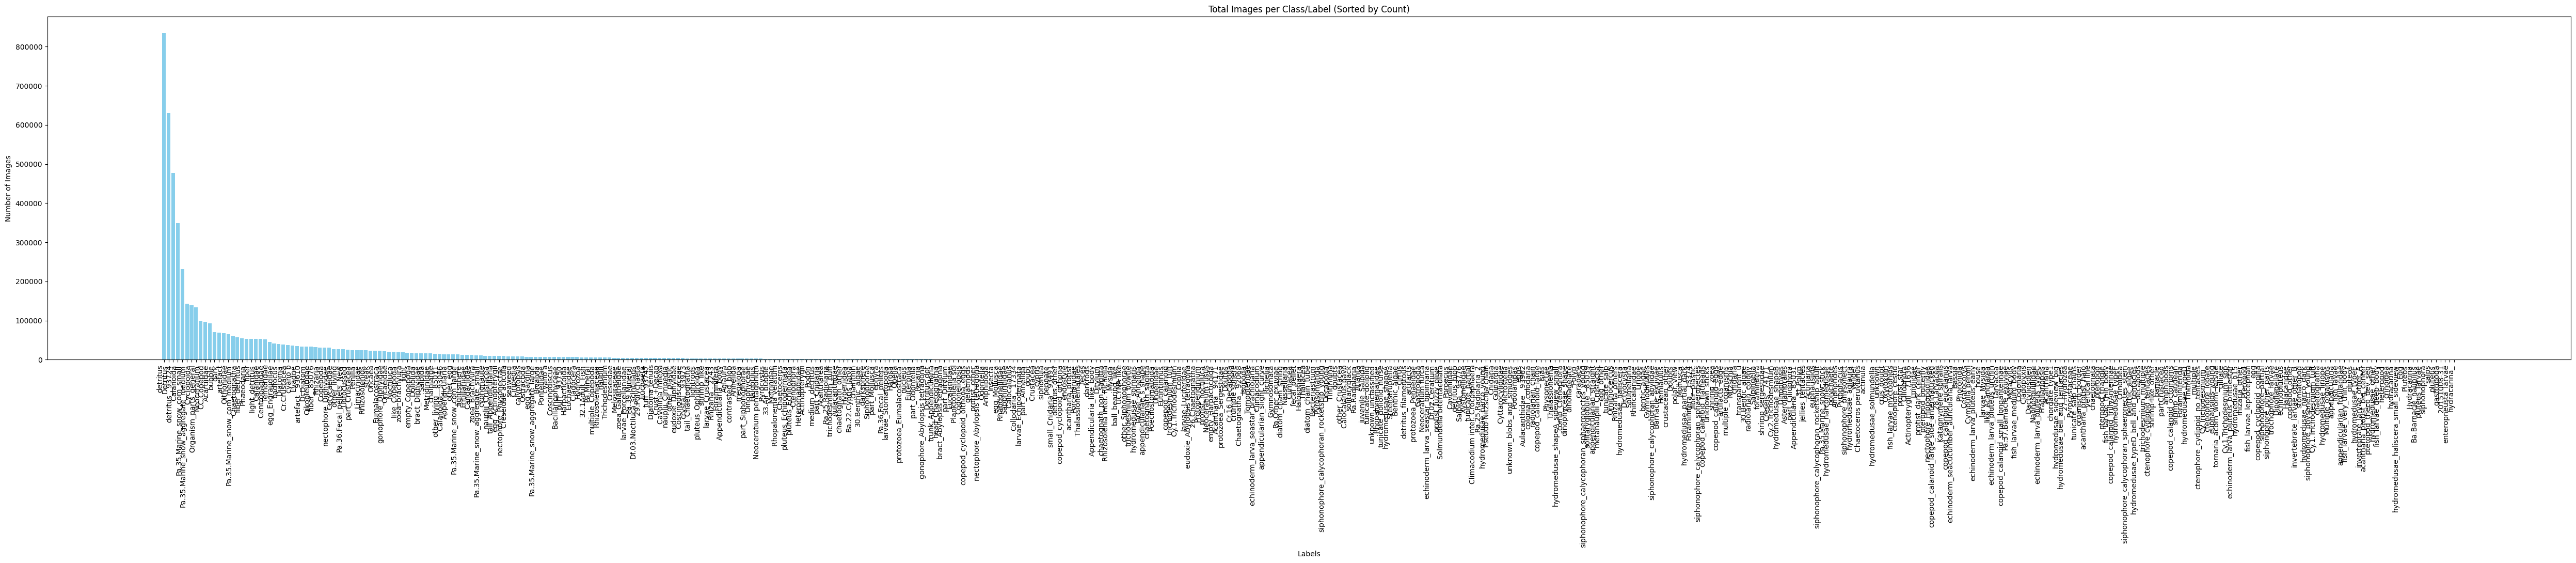

In [2]:
sorted_label_counts = dict(sorted(combined_label_counts.items(), key=lambda item: item[1], reverse=True))

# Plot the bar chart
plt.figure(figsize=(50, 11))
plt.bar(sorted_label_counts.keys(), sorted_label_counts.values(), color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Total Images per Class/Label (Sorted by Count)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# total number of images and classes across lmdb (for labelled data)

In [3]:
print(f"Total number of unique labels: {len(combined_label_counts)}")
total_images = sum(combined_label_counts.values())
print(f"Total number of images across all labels: {total_images}")

Total number of unique labels: 500
Total number of images across all labels: 5579594


# top 60 labels

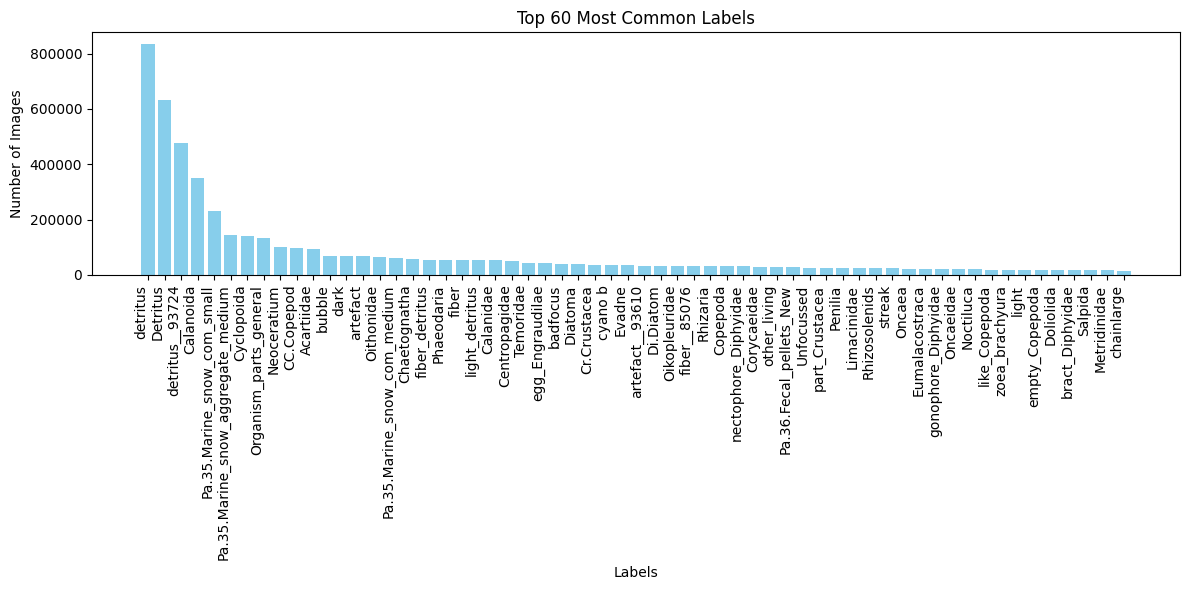

In [4]:
# Get the top 60 most common labels
top_n = 60
top_labels = combined_label_counts.most_common(top_n)

# Prepare data for the bar chart
labels, counts = zip(*top_labels)

plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title(f'Top {top_n} Most Common Labels')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


### Note : Labels needs to be unified 

# printing image with label and keys from lmdb file

Image Key in value folder: imgs_Acantharia__94171_294357519.png, Label: Acantharia__94171
Image Key in image folder: imgs_Acantharia__94171_294357519.png


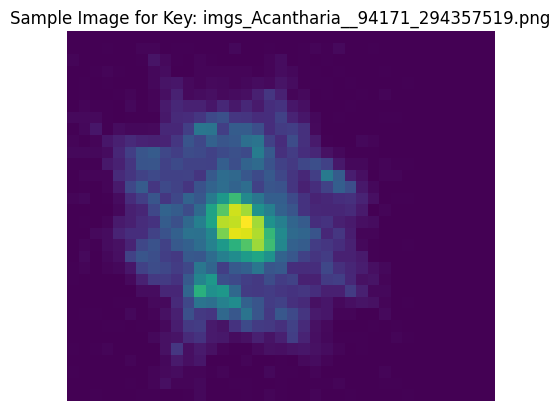

In [5]:

import lmdb
from collections import Counter
import io
from PIL import Image
import matplotlib.pyplot as plt

def get_labels_and_print_image(labels_lmdb_path, images_lmdb_path):
    """Extracts the first label and image key-value pair, and displays the image."""
    # Open the LMDB environment for labels
    env_labels = lmdb.open(labels_lmdb_path, readonly=True, lock=False)
    env_images = lmdb.open(images_lmdb_path, readonly=True, lock=False)

    # Retrieve the first label from the labels LMDB
    with env_labels.begin() as txn_labels:
        cursor_labels = txn_labels.cursor()
        for key, value in cursor_labels:
            key_str = key.decode()  # Image key
            label = value.decode()  # Label
            
            # Print the first key-value pair (label)
            print(f"Image Key in value folder: {key_str}, Label: {label}")
            break  # Stop after printing the first key-value pair
    
    # Retrieve the first image from the images LMDB and display it
    with env_images.begin() as txn_images:
        cursor_images = txn_images.cursor()
        for img_key, img_value in cursor_images:
            print(f"Image Key in image folder: {img_key.decode()}")  # Print image key
            img = Image.open(io.BytesIO(img_value))  # Open image using PIL

            # Display the image using matplotlib
            plt.imshow(img)
            plt.axis('off')  
            plt.title(f"Sample Image for Key: {img_key.decode()}")
            plt.show()
            break  # Stop after displaying the first image


folder = "UVPEC"
base_path = "/home/hk-project-p0021769/hgf_grc7525/workspace/hkfswork/hgf_grc7525-nick/data/lmdb_with_labels"
labels_lmdb_path = f"{base_path}/{folder}/labels"
images_lmdb_path = f"{base_path}/{folder}/images"

# Get label and image data and display the first image
get_labels_and_print_image(labels_lmdb_path, images_lmdb_path)


# code for seeing multiple images and labels

Image Key: 20141001-07_LClass_Pa.35.Marine_snow_aggregate_medium_20141004_122308.706.0.png, Label: Pa.35.Marine_snow_aggregate_medium


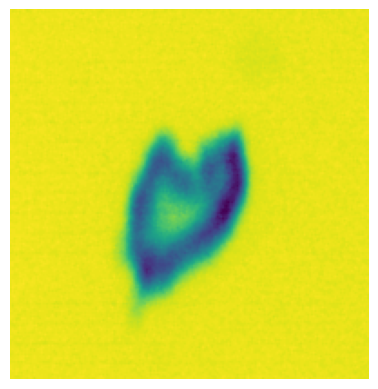

Image Key: 20141001-07_LClass_Pa.35.Marine_snow_aggregate_medium_20141004_122319.036.0.png, Label: Pa.35.Marine_snow_aggregate_medium


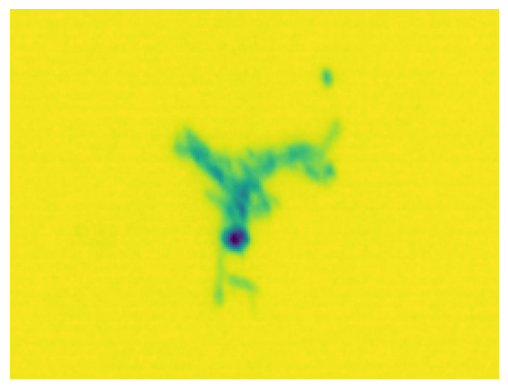

Image Key: 20141001-07_LClass_Pa.35.Marine_snow_aggregate_medium_20141004_122347.052.0.png, Label: Pa.35.Marine_snow_aggregate_medium


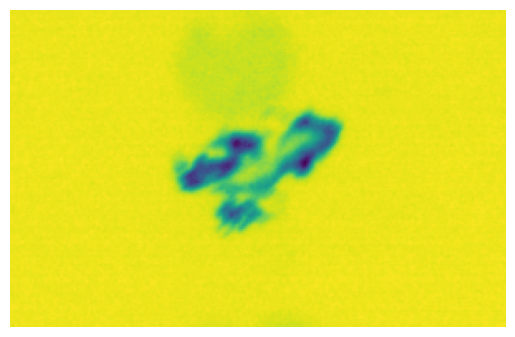

Image Key: 20141001-07_LClass_Pa.35.Marine_snow_aggregate_medium_20141004_122518.393.0.png, Label: Pa.35.Marine_snow_aggregate_medium


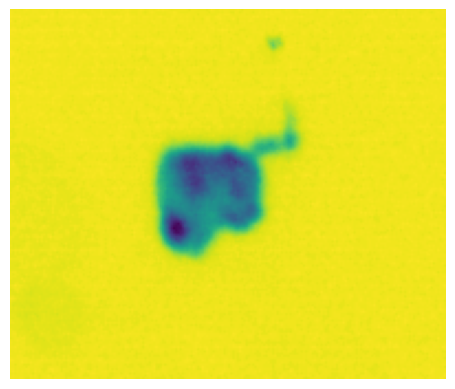

Image Key: 20141001-07_LClass_Pa.35.Marine_snow_aggregate_medium_20141004_122614.409.0.png, Label: Pa.35.Marine_snow_aggregate_medium


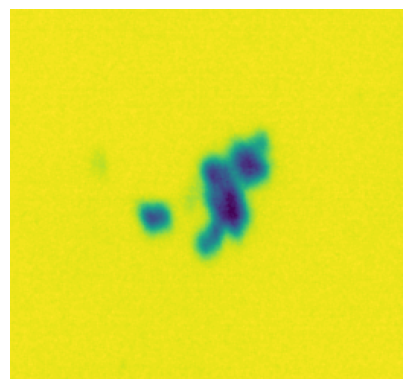

In [6]:
import lmdb
from collections import Counter
import io
from PIL import Image
import matplotlib.pyplot as plt

def get_labels_and_display_images(labels_lmdb_path, images_lmdb_path, start_idx, end_idx):
    """
    Extracts labels and displays images within the specified range of indices.
    
    Args:
        labels_lmdb_path (str): Path to the labels LMDB file.
        images_lmdb_path (str): Path to the images LMDB file.
        start_idx (int): Starting index of the range.
        end_idx (int): Ending index of the range.
    """
    # Open the LMDB environment for labels and images
    env_labels = lmdb.open(labels_lmdb_path, readonly=True, lock=False)
    env_images = lmdb.open(images_lmdb_path, readonly=True, lock=False)

    # Initialize counters
    idx = 0

    # Retrieve labels and images within the specified range
    with env_labels.begin() as txn_labels, env_images.begin() as txn_images:
        cursor_labels = txn_labels.cursor()
        cursor_images = txn_images.cursor()

        # Iterate over both labels and images
        for (label_key, label_value), (img_key, img_value) in zip(cursor_labels, cursor_images):
            if idx >= start_idx and idx < end_idx:
                # Decode the label and key
                label = label_value.decode()
                img = Image.open(io.BytesIO(img_value))

                # Display information and the image
                print(f"Image Key: {img_key.decode()}, Label: {label}")
                plt.imshow(img)
                plt.axis('off')
                #plt.title(f"Image Key: {img_key.decode()}")
                plt.show()
            
            idx += 1

            # Stop if the end index is reached
            if idx >= end_idx:
                break


folder = "CPICS"
base_path = "/home/hk-project-p0021769/hgf_grc7525/workspace/hkfswork/hgf_grc7525-nick/data/lmdb_with_labels"
labels_lmdb_path = f"{base_path}/{folder}/labels"
images_lmdb_path = f"{base_path}/{folder}/images"

# Display images within the specified index range
start_index = 10000
end_index = 10005
get_labels_and_display_images(labels_lmdb_path, images_lmdb_path, start_index, end_index)


# counting the total number of lmdb (folder wise)

In [8]:

def count_entries_in_lmdb(lmdb_path):
    """
    Counts the number of entries in the specified LMDB file.
    
    Args:
        lmdb_path (str): Path to the LMDB file.
    
    Returns:
        int: Total number of entries in the LMDB file.
    """
    # Open the LMDB environment
    env = lmdb.open(lmdb_path, readonly=True, lock=False)

    # Initialize counter
    count = 0

    # Iterate through the entries and count them
    with env.begin() as txn:
        cursor = txn.cursor()
        for _ in cursor:
            count += 1

    return count

# Path to the images LMDB file (CPICS)
folder = "CPICS"
base_path = "/home/hk-project-p0021769/hgf_grc7525/workspace/hkfswork/hgf_grc7525-nick/data/lmdb_with_labels"
images_lmdb_path = f"{base_path}/{folder}/images"

# Count the number of images
num_images = count_entries_in_lmdb(images_lmdb_path)
print(f"Total number of images in the LMDB file: {num_images}")


Total number of images in the LMDB file: 1505879
